In [1]:
    import math
    import pandas_datareader as web ##read in financial data
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler

    import matplotlib.pyplot as plt
    plt.style.use('fivethirtyeight')

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam

In [3]:
df = web.DataReader('GE', data_source='yahoo', 
                    start='2012-01-01', end='2019-12-31') 

In [4]:
df.head(n=8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,17.788462,17.528847,17.528847,17.653847,61054800.0,13.605167
2012-01-04,17.884615,17.576923,17.605770,17.846153,44464800.0,13.753371
2012-01-05,17.884615,17.586538,17.750000,17.836538,47651900.0,13.745956
2012-01-06,18.067308,17.846153,18.009615,17.932692,53112100.0,13.820059
2012-01-09,18.153847,17.846153,18.019230,18.134615,48866800.0,13.975679
2012-01-10,18.317308,17.903847,18.278847,18.000000,61718100.0,13.871931
2012-01-11,18.221153,17.788462,17.836538,18.153847,49783000.0,13.990497
2012-01-12,18.269230,18.038462,18.230770,18.201923,40516100.0,14.027551


In [5]:
#Create a new dataframe with only the 'Open' column
data = df.filter(['Open']) ##we store our open column
#Converting the dataframe to a numpy array
dataset = data.values


In [6]:
#dataset.shape

(2012, 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)#values from 0 to 1


In [27]:
train= scaled_data[:int(df.shape[0]*0.8)] #80% train
valid = scaled_data[int(df.shape[0]*0.8):]

In [9]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1609 403


In [10]:
def create_dataset(d, look_back=1):
    dataX, dataY = [], []
    for i in range(len(d)-look_back-1):
        a = d[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(d[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

ADAM = Adam(0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mse', optimizer='ADAM')


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [17]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1526 samples, validate on 81 samples
Epoch 1/10
1526/1526 [==============================] - 2s 2ms/step - loss: 604.6630 - val_loss: 179.9801
Epoch 2/10
1526/1526 [==============================] - 0s 92us/step - loss: 574.5789 - val_loss: 159.9449
Epoch 3/10
1526/1526 [==============================] - 0s 82us/step - loss: 522.9307 - val_loss: 125.4174
Epoch 4/10
1526/1526 [==============================] - 0s 239us/step - loss: 437.6741 - val_loss: 78.2459
Epoch 5/10
1526/1526 [==============================] - 0s 97us/step - loss: 327.7043 - val_loss: 34.5047
Epoch 6/10
1526/1526 [==============================] - 0s 182us/step - loss: 224.0196 - val_loss: 8.6658
Epoch 7/10
1526/1526 [==============================] - 0s 112us/step - loss: 148.5374 - val_loss: 0.5793
Epoch 8/10
1526/1526 [==============================] - 0s 96us/step - loss: 102.9243 - val_loss: 2.6971
Epoch 9/10
1526/1526 [==============================] - 0s 82us/step - loss: 73.1687 - val_loss: 9.2753


In [18]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

In [21]:
from numpy import newaxis

In [22]:
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

#### unseen values

[[17.993477]]
[[23.436394]]
[[24.641006]]
[[24.963497]]
[[25.07502]]
[[458.49002]
 [595.191  ]
 [625.44525]
 [633.54474]
 [636.3457 ]]


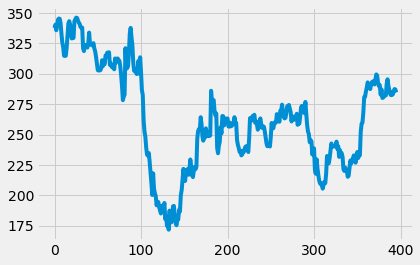

In [23]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)